In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg

# Задание 3.1
N = 33, K = 2,
(N+K)mod2 = 1,
(N+K)mod4 = 3.

In [4]:
N = 33
n = 5
# A точное
A_def = np.array([[(np.arctan(0.1 * (10*i + j + 1))) for j in range(n)] for i in range(n)])

# x точное
x_def = np.array([N] * n)

# вектор b
b = A_def @ x_def

# возмущенная матрица A*
A = np.copy(A_def)
A[0][0] += 10**-8
A

array([[0.09966866, 0.19739556, 0.29145679, 0.38050638, 0.46364761],
       [0.83298127, 0.87605805, 0.9151007 , 0.95054684, 0.98279372],
       [1.12637712, 1.14416883, 1.16066899, 1.17600521, 1.19028995],
       [1.25875421, 1.26791146, 1.27656176, 1.28474489, 1.29249667],
       [1.33156473, 1.33705315, 1.34229969, 1.34731973, 1.35212738]])

In [5]:
def solve(A, b):
    A = np.copy(A)
    n = len(A)
    for k in range(n):
        for i in range(k+1, n):
            A[i][k] = A[i][k] / A[k][k]
            for j in range(k+1, n):
                A[i][j] = A[i][j] - A[i][k]*A[k][j]
    x = np.zeros(n)
    y = np.zeros(n)
    
    for i in range(n):
        y[i] = b[i] - np.sum([A[i][j]*y[j] for j in range(i)])
    for i in range(n-1, -1, -1):
        x[i] = (y[i] - np.sum([x[j]*A[i][j] for j in range(n-1, i-1, -1)]))/A[i][i]
    
    return x        

In [6]:
def LUP_decomposition(A):
    n = len(A)
    L = np.eye(n)
    U = np.copy(A)
    P = np.eye(n)
    for k in range(n-1):
        L_k = np.eye(n)
        U_k = np.eye(n)
        P_k = np.eye(n)
        max_elem = U[k][k].copy()
        i_max = k
        for i in range(k+1, n):
            if abs(max_elem) < abs(U[i][k]):
                max_elem = U[i][k].copy()
                i_max = i
        P_k[i_max], P_k[k] = np.copy(P_k[k]), np.copy(P_k[i_max])
        U = P_k @ U
        
        for i in range(k+1, n):
            c = U[i][k]/U[k][k]
            U_k[i][k] = -c
            L_k[i][k] = c
        L = L @ P_k @ L_k
        U = U_k @ U
        P = P_k @ P
    L = P @ L
    return (L, U, P)

def LUP_solve(L, U, P, b):
    b = P @ b
    n = len(L)
    x = np.zeros(n)
    y = np.zeros(n)
    
    for i in range(n):
        y[i] = b[i] - np.sum([L[i][j]*y[j] for j in range(i)])
    for i in range(n-1, -1, -1):
        x[i] = (y[i] - np.sum([x[j] * U[i][j] for j in range(n-1, i-1, -1)]))/U[i][i]
    
    return x

In [7]:
A_check = np.array([[4, 1, 1], [2, 5.5, 1], [2, 1, 4]])
x_check = np.array([1]*3)
b_check = A_check @ x_check

x1_check = solve(A_check, b_check)
print('1-ый метод:', x1_check)

L_check, U_check, P_check = LUP_decomposition(A_check)
x2_check = LUP_solve(L_check, U_check, P_check, b_check)
print('2-ой метод:', x2_check)

x3_check = linalg.solve(A_check, b_check)
print('Встроенный метод:', x3_check)

print('Точное решение:', x_check)





1-ый метод: [1. 1. 1.]
2-ой метод: [1. 1. 1.]
Встроенный метод: [1. 1. 1.]
Точное решение: [1 1 1]


In [8]:
x1 = solve(A, b)
L, U, P = LUP_decomposition(A)
x2 = LUP_solve(L, U, P, b)

print('1-ый метод: ', x1)
print('2-ой метод: ', x2)
print('Встроенный метод:', linalg.solve(A,b))

1-ый метод:  [33.00026739 32.99861084 33.0026199  32.99785607 33.0006458 ]
2-ой метод:  [33.00026741 32.99861075 33.00262004 32.99785597 33.00064583]
Встроенный метод: [33.00026738 32.99861086 33.00261986 32.9978561  33.0006458 ]


In [9]:
# евклидова норма
# погрешность delta x
def delta_x(x, x_def):
    return linalg.norm(x-x_def, ord=2)/linalg.norm(x, ord=2)

# оценка погрешности delta x
def score_delta_x(A):
    return np.linalg.cond(A) * (10**-3 / linalg.norm(A, ord=2)) 

In [10]:
# Число обусловленности матрицы A
print('Число обусловленности: ', np.linalg.cond(A))
print('Погрешность решения: ', delta_x(x1, x_def))
print('Оценка погрешности: ', score_delta_x(A))

Число обусловленности:  56410634.477381
Погрешность решения:  5.048636080019752e-05
Оценка погрешности:  10575.747732964846


In [11]:
# погрешности решений обоих методов как функций, зависящих от n
delta_x1 = []
delta_x2 = []
delta_x3 = []

# Решение системы обоими методами для матрицы размера n = 5..15
for n in range(5, 16):
    A_def = np.array([[(
        np.arctan(0.1 * (10*i + j + 1))) 
        for j in range(n)] 
        for i in range(n)] )
    x_def = np.array([N] * n)
    b = A_def @ x_def
    A = np.copy(A_def)
    # A[0][0] += 10**-8
    # 1-ый метод
    x1 = solve(A, b)
    # 2-ой метод
    L, U, P = LUP_decomposition(A)
    x2 = LUP_solve(L, U, P, b)
    
    # Встроенный метод
    x3 = linalg.solve(A, b)
    delta_x1.append(delta_x(x1, x_def))
    delta_x2.append(delta_x(x2, x_def))
    delta_x3.append(delta_x(x3, x_def))

<ipython-input-11-8651720ed71f>:23: LinAlgWarning: Ill-conditioned matrix (rcond=1.56072e-18): result may not be accurate.
  x3 = linalg.solve(A, b)
<ipython-input-11-8651720ed71f>:23: LinAlgWarning: Ill-conditioned matrix (rcond=2.03865e-18): result may not be accurate.
  x3 = linalg.solve(A, b)
<ipython-input-11-8651720ed71f>:23: LinAlgWarning: Ill-conditioned matrix (rcond=2.62393e-18): result may not be accurate.
  x3 = linalg.solve(A, b)
<ipython-input-11-8651720ed71f>:23: LinAlgWarning: Ill-conditioned matrix (rcond=7.21121e-19): result may not be accurate.
  x3 = linalg.solve(A, b)
<ipython-input-11-8651720ed71f>:23: LinAlgWarning: Ill-conditioned matrix (rcond=9.29048e-19): result may not be accurate.
  x3 = linalg.solve(A, b)
<ipython-input-11-8651720ed71f>:23: LinAlgWarning: Ill-conditioned matrix (rcond=8.26485e-20): result may not be accurate.
  x3 = linalg.solve(A, b)


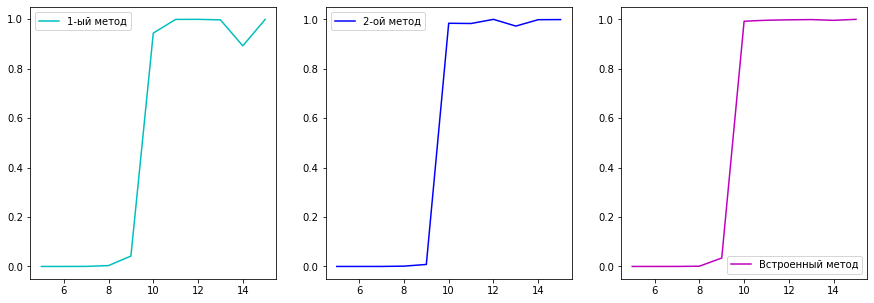

In [12]:
fig, axs = plt.subplots(1, 3, figsize=(15,5))

# строим графики
axs[0].plot(range(5,16), delta_x1, color='c', ls='-', label='1-ый метод')
axs[1].plot(range(5,16), delta_x2, color='b', ls='-', label='2-ой метод')
axs[2].plot(range(5,16), delta_x3, color='m', ls='-', label='Встроенный метод')

axs[0].legend()
axs[1].legend()
axs[2].legend()

# Задание 3.2

In [21]:
n = 65
a = 87
d = 30
c = 4
b = np.array([n*i + n for i in range(n)])

In [22]:
def second_task(a,c,d, b):
    x = np.zeros(n)
    for i in range(2,10):
        alpha = np.zeros(5)
        beta  = np.zeros(5)
        alpha[0] = b[46+i]/c
        beta[0] = -a/c
        alpha[1] = b[66-i]/c
        beta[1] = -a/c
        alpha[2] = (b[i] - a*alpha[1])/(a*beta[1] + c)
        beta[2] = -d/(a*beta[1] + c)
        alpha[3] = (b[20-i] - a*alpha[0])/(a*beta[0] + c)
        beta[3] = -d/(a*beta[0] + c)
        alpha[4] = (b[23+i] - d*alpha[3])/(d*beta[3] + c)
        beta[4] = -a/(d*beta[3] + c)
        
        x[i+23] = (b[43-i] - a*alpha[4] - d*alpha[2])/(a*beta[4] + d*beta[2] + c)
        x[43-i] = alpha[4] + beta[4]*x[i+23]
        x[46+i] = alpha[3] + beta[3]*x[43-i]
        x[66-i] = alpha[2] + beta[2]*x[i+23]
        x[i] = alpha[1] + beta[1]*x[66-i]
        x[20-i] = alpha[0] + beta[0]*x[46+i]
    for i in range(19,22):
        alpha = np.zeros(5)
        beta  = np.zeros(5)
        alpha[0] = b[i+23]/a
        beta[0] = -c/a
        alpha[1] = b[66-i]/a
        beta[1] = -c/a
        alpha[2] = (b[i] - d*alpha[0] - c*alpha[1])/(a+c*beta[1])
        beta[2] = -d*beta[0]/(a+c*beta[1])
        
        x[43-i] = (b[43-i] - d*alpha[1] - d*beta[1] - c*alpha[0])/(a + d*beta[1]*beta[2] + c*beta[0])
        x[i] = alpha[2] + beta[2]*x[43-i]
        x[66-i] = alpha[1] + beta[1]*x[i]
        x[i+23] = alpha[0] + beta[0]*x[43-i]
    alpha = np.zeros(2)
    beta = np.zeros(2)
    alpha[0] = b[56]/c
    beta[0] = -a/c
    alpha[1] = b[33]/a
    beta[1] = -d/a
    x[56] = (b[10] - a*alpha[0] - d*alpha[1])/(a*beta[0] + d*beta[1] + c)
    x[33] = alpha[1] + beta[1]*x[56]
    x[10] = alpha[0] + beta[0]*x[56]
    x[0] = (b[0] - d*x[23])/a
    x[1] = (b[1] - d*x[24])/a
    
    return x
       
        

In [23]:
x = second_task(a,c,d,b)

In [24]:
# тестовывй пример заключается в том, что все x_i = 1
y = np.zeros(n)
for i in range(0,2):
    y[i] = a + d
for i in range(2,42):
    y[i] = a + d + c
y[33] = a + d
for i in range(42, 65):
    y[i] = a + c
x_test = second_task(a,c,d,y)
print(x_test)

[0.99991294 0.99991294 1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.00000401 1.00000401 1.00000401 1.00025248 1.00025248
 1.00025248 1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 0.99998839 0.99998839 0.99998839 0.99999982 0.99999982 0.99999982
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.        ]


# Задание 3.3

In [25]:
def MRM(A, b, eps):
    r = np.zeros(26)
    x = np.zeros(26)
    r = A @ x - b
    it = 0
    while linalg.norm(A @ x - b, ord=2)/linalg.norm(b, ord=2) >= eps:
        t = np.sum((A @ r) * r) / np.sum((A @ r)*(A @ r))
        x = x - t * r
        r = A @ x - b
        it += 1
    return x, it

In [26]:
beta = (abs(66- N) + 5) * 26
print('beta = ', beta)

A = np.array([[np.math.cos(i+j)/(0.1 * beta) + 0.1 * beta * np.math.exp(-(i - j)**2) for j in range(26)] for i in range(26)])
x_def = np.array([N]*26)
b = A @ x_def
x, it = MRM(A, b, 10**-12)
print('Решение системы методом минимальных невязок: {0}, Количество итераций: {1}'.format(x, it))

beta =  988
Решение системы методом минимальных невязок: [33. 33. 33. 33. 33. 33. 33. 33. 33. 33. 33. 33. 33. 33. 33. 33. 33. 33.
 33. 33. 33. 33. 33. 33. 33. 33.], Количество итераций: 59
